<a href="https://colab.research.google.com/github/wcrowley342/Donordata/blob/main/Donation_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

text/copy on how nonprofits can benefit from data analysis. Brief intro of unscripted and description of data in order to run through a real life example

# Data import & Prep

Any kind of data analysis starts with getting hold of some data; lets go ahead and import our data

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#use FiveThirtyEight Style
import matplotlib.style as style
plt.style.use('fivethirtyeight')

#import data
donations = pd.read_csv('https://raw.githubusercontent.com/wcrowley342/Donordata/main/Copy%20of%20donation%20data%20unscripted%20(V3%20cleaned%20anonymous)%20-%20transactions-2022-02-16-641663456.csv')

#preview/inspect data
donations.head()

,campaign,reference#,donorID,city,state,country,method,amount,donation_time,referer,subtype,description,quantity
0,Donate to Unscripted,7043548105,NAME001,New York,NY,USA,check,5.00,2022-01-12 3:58:39,NaN,donation,Donation to The Unscripted Project,1
1,Unscripted Back to School 2021 Campaign,1591035482,NAME002,NaN,NaN,USA,cash,"14,325.00",2022-01-12 2:22:24,https://dashboard.givebutter.com/,donation,Donation to The Unscripted Project,1
2,Unscripted Back to School 2021 Campaign,9247396696,NAME003,NaN,NaN,NaN,venmo,"1,000.00",2022-01-11 20:33:54,NaN,donation,Donation to The Unscripted Project,1
3,Unscripted Back to School 2021 Campaign,4595351851,NAME004,NaN,NaN,NaN,paypal,10.00,2022-01-10 16:50:57,https://linktr.ee/,donation,Donation to The Unscripted Project,1
4,Unscripted Back to School 2021 Campaign,5975702880,NAME005,NaN,NY,USA,cash,200.00,2022-01-03 2:13:19,https://dashboard.givebutter.com/,donation,Donation to The Unscripted Project,1


In [2]:
#.info() function: Explore data types and nulls/ NaNs in your data
donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign       353 non-null    object
 1   reference#     353 non-null    int64 
 2   donorID        353 non-null    object
 3   city           302 non-null    object
 4   state          303 non-null    object
 5   country        313 non-null    object
 6   method         342 non-null    object
 7   amount         353 non-null    object
 8   donation_time  353 non-null    object
 9   referer        69 non-null     object
 10  subtype        353 non-null    object
 11  description    353 non-null    object
 12  quantity       353 non-null    int64 
dtypes: int64(2), object(11)
memory usage: 36.0+ KB


In [3]:
donations.describe()

,reference#,quantity
count,3.530000e+02,353.000000
mean,5.650464e+09,1.067989
std,2.549184e+09,0.303241
min,1.016118e+09,1.000000
25%,3.417488e+09,1.000000
50%,6.011432e+09,1.000000
75%,7.712914e+09,1.000000
max,9.958781e+09,4.000000


Use that sweet dataprep package? 
https://medium.com/towards-data-science/speeding-up-exploratory-data-analysis-with-python-838fe5e25b43  

# Data cleanup

In [4]:
#clean up currency formatting 
donations['amount']=donations['amount'].str.replace(',','')
donations['amount'] = donations['amount'].astype('float')
#donations['amount']=donations['amount'].str.replace(',','')

In [5]:
#dropping some columns

donations = donations.drop(columns=['reference#'])

donations.head(5)

,campaign,donorID,city,state,country,method,amount,donation_time,referer,subtype,description,quantity
0,Donate to Unscripted,NAME001,New York,NY,USA,check,5.0,2022-01-12 3:58:39,NaN,donation,Donation to The Unscripted Project,1
1,Unscripted Back to School 2021 Campaign,NAME002,NaN,NaN,USA,cash,14325.0,2022-01-12 2:22:24,https://dashboard.givebutter.com/,donation,Donation to The Unscripted Project,1
2,Unscripted Back to School 2021 Campaign,NAME003,NaN,NaN,NaN,venmo,1000.0,2022-01-11 20:33:54,NaN,donation,Donation to The Unscripted Project,1
3,Unscripted Back to School 2021 Campaign,NAME004,NaN,NaN,NaN,paypal,10.0,2022-01-10 16:50:57,https://linktr.ee/,donation,Donation to The Unscripted Project,1
4,Unscripted Back to School 2021 Campaign,NAME005,NaN,NY,USA,cash,200.0,2022-01-03 2:13:19,https://dashboard.givebutter.com/,donation,Donation to The Unscripted Project,1


In [6]:
donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   campaign       353 non-null    object 
 1   donorID        353 non-null    object 
 2   city           302 non-null    object 
 3   state          303 non-null    object 
 4   country        313 non-null    object 
 5   method         342 non-null    object 
 6   amount         353 non-null    float64
 7   donation_time  353 non-null    object 
 8   referer        69 non-null     object 
 9   subtype        353 non-null    object 
 10  description    353 non-null    object 
 11  quantity       353 non-null    int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 33.2+ KB


In [7]:
donations.describe()

,amount,quantity
count,353.000000,353.000000
mean,217.424929,1.067989
std,990.125024,0.303241
min,0.000000,1.000000
25%,25.000000,1.000000
50%,50.000000,1.000000
75%,99.000000,1.000000
max,14325.000000,4.000000


In [8]:
#https://www.kite.com/python/answers/how-to-convert-a-pandas-dataframe-column-to-datetime-in-python

#conversion efforts
donations['donation_times'] = pd.to_datetime(donations["donation_time"]) 

#adding day of week 
donations['donation_day'] = donations['donation_times'].dt.dayofweek

#dropping old donation_date
donations.drop('donation_time', axis=1, inplace=True)

donations.head()

donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   campaign        353 non-null    object        
 1   donorID         353 non-null    object        
 2   city            302 non-null    object        
 3   state           303 non-null    object        
 4   country         313 non-null    object        
 5   method          342 non-null    object        
 6   amount          353 non-null    float64       
 7   referer         69 non-null     object        
 8   subtype         353 non-null    object        
 9   description     353 non-null    object        
 10  quantity        353 non-null    int64         
 11  donation_times  353 non-null    datetime64[ns]
 12  donation_day    353 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 36.0+ KB


In [9]:
#get the summary statistics for the numerical varaibles in your dataset 

donations.describe()

,amount,quantity,donation_day
count,353.000000,353.000000,353.000000
mean,217.424929,1.067989,2.736544
std,990.125024,0.303241,1.809460
min,0.000000,1.000000,0.000000
25%,25.000000,1.000000,1.000000
50%,50.000000,1.000000,2.000000
75%,99.000000,1.000000,4.000000
max,14325.000000,4.000000,6.000000



# (Who) most frequent / profitable donors

In [23]:
#average donation

donations.amount.mean()

217.42492917847025

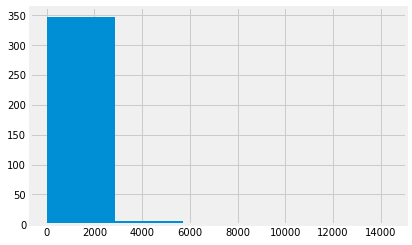

In [29]:
donations.amount.hist(bins=5)

In [32]:
donations.amount.value_counts()

25.0       60
65.0       44
130.0      36
35.0       28
50.0       22
15.0       18
20.0       17
30.0       16
100.0      12
250.0      12
0.0        11
70.0       10
10.0        8
60.0        6
5.0         5
40.0        5
45.0        4
5000.0      4
150.0       3
75.0        3
80.0        3
2000.0      3
1000.0      3
200.0       2
500.0       2
1250.0      2
5319.0      1
21.0        1
1950.0      1
66.0        1
125.0       1
78.0        1
14325.0     1
27.0        1
1755.0      1
750.0       1
210.0       1
105.0       1
99.0        1
151.0       1
Name: amount, dtype: int64

In [12]:
#top10 biggest donations
biggest_donations = donations.sort_values("amount", ascending = False)
biggest_donations.head(10)

,campaign,donorID,city,state,country,method,amount,referer,subtype,description,quantity,donation_times,donation_day
1,Unscripted Back to School 2021 Campaign,NAME002,NaN,NaN,USA,cash,14325.0,https://dashboard.givebutter.com/,donation,Donation to The Unscripted Project,1,2022-01-12 02:22:24,2
212,Unscripted 20/2020 Fall Campaign,NAME257,Philadelphia,PA,USA,cash,5319.0,NaN,donation,Donation to The Unscripted Project,1,2020-12-20 21:55:07,6
317,Unscripted 20/2020 Fall Campaign,NAME018,Philadelphia,PA,USA,cash,5000.0,NaN,donation,Donation to The Unscripted Project,1,2020-11-16 19:49:39,0
167,Unscripted Back to School 2021 Campaign,NAME136,New York,NY,USA,cash,5000.0,https://dashboard.givebutter.com/,donation,Donation to The Unscripted Project,1,2021-11-16 01:36:23,1
105,Unscripted Back to School 2021 Campaign,NAME059,NaN,NaN,USA,check,5000.0,https://dashboard.givebutter.com/,donation,Donation to The Unscripted Project,1,2021-11-30 19:44:42,1
101,Unscripted Back to School 2021 Campaign,NAME092,Wilmington,DE,USA,card,5000.0,https://www.google.com/,donation,Donation to The Unscripted Project,1,2021-11-30 21:56:09,1
71,Unscripted Back to School 2021 Campaign,NAME066,Shanghai,China,CHN,card,2000.0,NaN,donation,Donation to The Unscripted Project,1,2021-12-06 14:11:00,0
237,Unscripted 20/2020 Fall Campaign,NAME274,New York,NY,USA,cash,2000.0,NaN,donation,Donation to The Unscripted Project,1,2020-11-30 16:28:31,0
238,Unscripted 20/2020 Fall Campaign,NAME059,New York,NY,USA,cash,2000.0,NaN,donation,Donation to The Unscripted Project,1,2020-11-30 16:26:45,0
311,Unscripted 20/2020 Fall Campaign,NAME066,shanghai,china,CHN,card,1950.0,NaN,donation,Donation to The Unscripted Project,1,2020-11-17 15:48:20,1


In [13]:
#top 5 donors based on numbers of donations
donations['donorID'].value_counts()[:5]

NAME018    7
NAME056    5
NAME025    5
NAME036    5
NAME064    4
Name: donorID, dtype: int64

In [22]:
#top 5 donors

top_five_donors = donations.groupby(['donorID']).sum().sort_values('amount',ascending=False)

top_five_donors = top_five_donors.drop(columns=['donation_day'])

top_five_donors.head(5)

,amount,quantity
donorID,,
NAME002,14325.0,1
NAME059,7130.0,5
NAME018,6738.0,7
NAME257,5319.0,1
NAME136,5000.0,1


In [ ]:
unstacked_top_five_donors = top_five_donors.reset_index()

In [ ]:
unstacked_top_five_donors.head()

,donorID,amount,quantity
0,NAME002,14325.0,1
1,NAME059,7130.0,5
2,NAME018,6738.0,7
3,NAME257,5319.0,1
4,NAME136,5000.0,1


In [ ]:
top_five_donors_graph = unstacked_top_five_donors.drop(columns=['quantity'])

In [ ]:
final_graph = top_five_donors_graph.head(5)
final_graph

,donorID,amount
0,NAME002,14325.0
1,NAME059,7130.0
2,NAME018,6738.0
3,NAME257,5319.0
4,NAME136,5000.0


In [ ]:
final_graph.set_index('donorID')

,amount
donorID,
NAME002,14325.0
NAME059,7130.0
NAME018,6738.0
NAME257,5319.0
NAME136,5000.0


In [ ]:
final_graph.reset_index()
final_graph

,donorID,amount
0,NAME002,14325.0
1,NAME059,7130.0
2,NAME018,6738.0
3,NAME257,5319.0
4,NAME136,5000.0


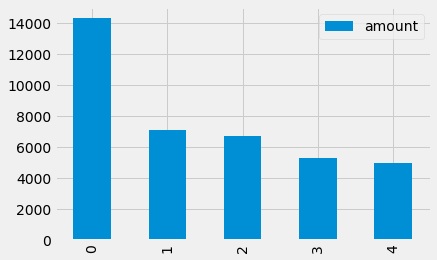

In [ ]:
final_graph.plot(kind='bar')

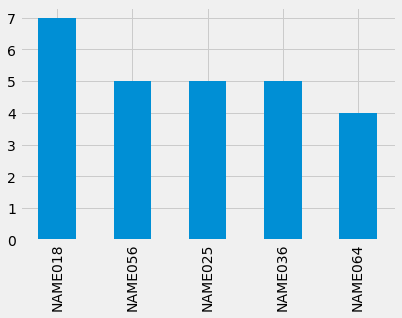

In [ ]:
donors_graph = donations['donorID'].value_counts()[:5].plot(kind='bar')

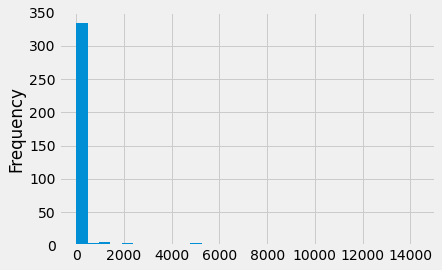

In [ ]:
#histograms

donations['amount'].plot(kind='hist',bins=30)
title ='Donation Amount Histogram'
x ='$ amount'
y = 'Frequency'
plt.show()

Text(0.5, 0, '$ amount')

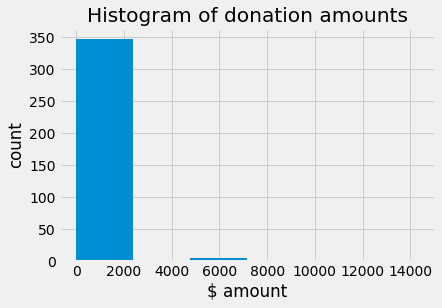

In [ ]:
donations.amount.plot.hist(bins=6)
plt.title("Histogram of donation amounts")
plt.ylabel('count')
plt.xlabel('$ amount')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


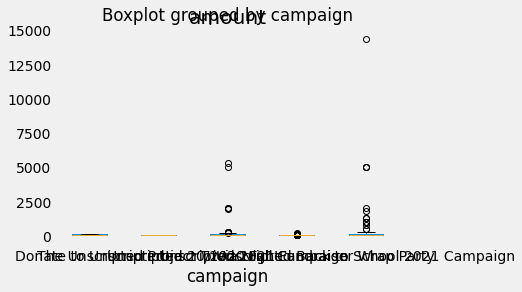

In [ ]:
donations.boxplot(by='campaign', column=['amount'], grid=False)

# Comparing Campaigns / Group by

In [ ]:
campaigns = donations.groupby(by=['campaign'])

In [ ]:
campaigns.agg(['mean','median'])

reference#                \
                                                 mean        median   
campaign                                                              
Donate to Unscripted                     5.821109e+09  6.536412e+09   
The Unscripted Project Trivia Night      6.560632e+09  6.590453e+09   
Unscripted 20/2020 Fall Campaign         5.756323e+09  6.093272e+09   
Unscripted 2021 Fundraiser Wrap Party    5.544661e+09  6.180460e+09   
Unscripted Back to School 2021 Campaign  5.291019e+09  5.128452e+09   

                                             amount         quantity         \
                                               mean median      mean median   
campaign                                                                      
Donate to Unscripted                      55.500000   25.0  1.000000    1.0   
The Unscripted Project Trivia Night       34.242424   30.0  1.454545    1.0   
Unscripted 20/2020 Fall Campaign         171.680556   50.0  1.000000    1.0   
Unscripted 2021 Fundraiser Wrap Party     37.500000   35.0  1.180000    1.0   
Unscripted Back to School 2021 Campaign  417.836207   65.0  1.000000    1.0   

                                                       donation_times  \
                                                                 mean   
campaign                                                                
Donate to Unscripted                    2021-07-22 00:24:49.400000000   
The Unscripted Project Trivia Night     2021-04-29 16:24:42.454545408   
Unscripted 20/2020 Fall Campaign        2020-11-22 17:51:00.402777856   
Unscripted 2021 Fundraiser Wrap Party   2021-12-08 22:29:03.700000000   
Unscripted Back to School 2021 Campaign 2021-12-01 06:49:16.767241216   

                                                                donation_day  \
                                                         median         mean   
campaign                                                                       
Donate to Unscripted                    2021-07-29 03:07:18.500     2.600000   
The Unscripted Project Trivia Night     2021-04-29 15:03:27.000     3.636364   
Unscripted 20/2020 Fall Campaign        2020-11-20 08:25:32.000     2.361111   
Unscripted 2021 Fundraiser Wrap Party   2021-12-10 01:17:14.500     3.580000   
Unscripted Back to School 2021 Campaign 2021-11-30 17:25:51.500     2.594828   

                                                
                                        median  
campaign                                        
Donate to Unscripted                       2.5  
The Unscripted Project Trivia Night        3.0  
Unscripted 20/2020 Fall Campaign           2.0  
Unscripted 2021 Fundraiser Wrap Party      4.0  
Unscripted Back to School 2021 Campaign    2.0

In [ ]:
#grouped linecharts showing donation $ for day of week

In [ ]:
donations.plot(kind='hist', bins=30)

In [ ]:
#heatmap based on STATE!! ($$ > COUNT of donations )

In [ ]:
#group campaign, show averages 

donations.groupby(['campaign']).mean().sort_values('amount',ascending=False)

,reference#,amount,quantity
campaign,,,
Unscripted Back to School 2021 Campaign,5.291019e+09,417.836207,1.000000
Unscripted 20/2020 Fall Campaign,5.756323e+09,171.680556,1.000000
Donate to Unscripted,5.821109e+09,55.500000,1.000000
Unscripted 2021 Fundraiser Wrap Party,5.544661e+09,37.500000,1.180000
The Unscripted Project Trivia Night,6.560632e+09,34.242424,1.454545


In [ ]:
#group by method

donations.groupby(['method']).mean().sort_values('amount',ascending=False)

,reference#,amount,quantity
method,,,
check,6.254909e+09,1673.333333,1.000000
ach,9.824879e+09,500.000000,1.000000
cash,5.739513e+09,417.933962,1.000000
card,5.182404e+09,157.455224,1.074627
venmo,7.477352e+09,87.545455,1.045455
digital_wallet,5.600702e+09,53.690476,1.142857
paypal,5.559627e+09,48.529412,1.117647


In [ ]:
#group by state 
#need to group by 'x'/state, and then aggregate by 'y'/churn

print(donations.groupby('campaign')['method'].value_counts())

campaign                                 method        
Donate to Unscripted                     card               7
                                         venmo              2
                                         check              1
The Unscripted Project Trivia Night      card              14
                                         paypal             8
                                         venmo              5
                                         digital_wallet     4
                                         cash               1
                                         check              1
Unscripted 20/2020 Fall Campaign         cash              64
                                         card              40
                                         paypal            18
                                         digital_wallet    13
                                         venmo              9
Unscripted 2021 Fundraiser Wrap Party    card              23
              

# (Where) Map of states

In [ ]:
#top 5 states based on numbers of donations
donations['state'].value_counts()[:5]

NY    124
PA     67
CA     41
NJ     16
DC      7
Name: state, dtype: int64

In [ ]:
map_data = pd.DataFrame(donations['state'].value_counts())

In [ ]:
map_data.head()

,state
NY,124
PA,67
CA,41
NJ,16
DC,7


In [ ]:
map_data = map_data.reset_index()


In [ ]:
map_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   34 non-null     object
 1   state   34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 672.0+ bytes


In [ ]:
map_data.head()

,index,state
0,NY,124
1,PA,67
2,CA,41
3,NJ,16
4,DC,7


In [ ]:
map_data.columns =['state', 'count']

In [ ]:
map_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, NY to RI
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   state   34 non-null     int64
dtypes: int64(1)
memory usage: 544.0+ bytes


In [ ]:
map_data.head()

,state,count
0,NY,124
1,PA,67
2,CA,41
3,NJ,16
4,DC,7


In [ ]:
!pip install plotly
!pip install plotly-geo
!pip install geopandas --upgrade
!pip install pyshp==1.2.10
!pip install shapely==1.6.3
!pip install chart_studio

     |████████████████████████████████| 23.7 MB 3.4 MB/s 
     |████████████████████████████████| 1.0 MB 28.1 MB/s 
     |████████████████████████████████| 16.7 MB 53.9 MB/s 
     |████████████████████████████████| 6.3 MB 40.0 MB/s 
     |████████████████████████████████| 176 kB 26.8 MB/s 
  Created wheel for pyshp: filename=pyshp-1.2.10-py3-none-any.whl size=20493 sha256=7ff850b6d36f1b5c1338accd9d6e94cb3573cbfa0ec12345659a6a723f41cdd8
  Stored in directory: /root/.cache/pip/wheels/aa/cb/ed/c4af42e7718157f9a76dea841c585e0577742ffed5a5b17d32
Successfully built pyshp
     |████████████████████████████████| 223 kB 17.7 MB/s 
  Created wheel for shapely: filename=Shapely-1.6.3-cp37-cp37m-linux_x86_64.whl size=636658 sha256=765cbb8cfea74cb9c0a6388dd6344a74a096f7c2b561c1689205e7a29f7ef659
  Stored in directory: /root/.cache/pip/wheels/89/9f/1e/de1b1c770313c6a9838cc9c4da4c59f5b2db78b34078d29d01
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely

In [ ]:
import plotly as py

In [ ]:
#instruction youtube https://www.youtube.com/watch?v=sXuoikhChYo

In [ ]:
import plotly.graph_objects as go

In [ ]:
data = dict(type='choropleth', 
            colorscale = 'Blues',
            z = map_data['count'],
            locations = map_data['state'],
            locationmode = 'USA-states',
            text=map_data['state'],
            marker = dict(line = dict(color = 'rgb(255,255,255)', width=1)),
            colorbar = {'title' : 'US dolloar'})

In [ ]:
layout = dict(title = 'US Donations Maps',
              geo = dict(scope = 'usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)'))

In [ ]:
choromap = go.Figure(data = [data], layout=layout)

In [ ]:
choromap.show()

In [ ]:
#instructions https://plotly.com/python/county-choropleth/

fig = px.choropleth(locations = map_data['state'], locationmode="USA-states", color = map_data['count'], scope="usa")
fig.show()

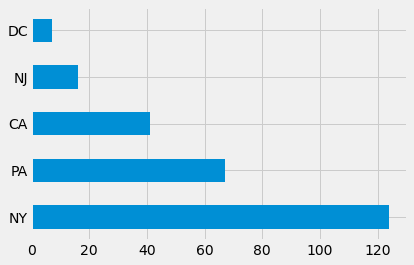

In [ ]:
donations['state'].value_counts()[:5].plot(kind='barh')

# (How) Preferred Donation Method 


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<function matplotlib.pyplot.box>

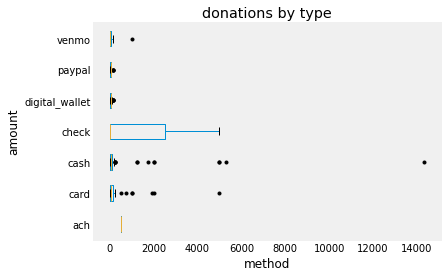

In [38]:
donations.boxplot(column='amount', by='method', vert=False, grid=False,
                    sym='k.')
plt.suptitle('')
plt.title('donations by type')
plt.xlabel('method')
plt.ylabel('amount')
plt.box

In [ ]:
#breakdown of donations by type
donations_by_method = donations.groupby('method').campaign.count()
donations_by_method

method
ach                 1
card              134
cash              106
check               3
digital_wallet     42
paypal             34
venmo              22
Name: campaign, dtype: int64

In [53]:
from collections import Counter
print(Counter(donations['method']))

Counter({'card': 134, 'cash': 106, 'digital_wallet': 42, 'paypal': 34, 'venmo': 22, nan: 11, 'check': 3, 'ach': 1})


In [54]:
method_type = donations.groupby('method').agg('count')
print(method_type)

                campaign  donorID  city  state  country  amount  referer  \
method                                                                     
ach                    1        1     0      0        0       1        0   
card                 134      134   134    134      134     134       20   
cash                 106      106    96     97      106     106       40   
check                  3        3     2      2        3       3        1   
digital_wallet        42       42    42     42       42      42        2   
paypal                34       34    18     18       18      34        5   
venmo                 22       22    10     10       10      22        0   

                subtype  description  quantity  donation_times  donation_day  
method                                                                        
ach                   1            1         1               1             1  
card                134          134       134             134           134  

In [55]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [56]:
method_labels = method_type.campaign.sort_values().index 
method_counts = method_type.campaign.sort_values()

In [50]:
#plt.figure(1, figsize=(20,10)) 
#the_grid = GridSpec(2, 2)

<Figure size 1440x720 with 0 Axes>

In [57]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

In [61]:
plt.figure(1, figsize=(40,30)) 
the_grid = GridSpec(2, 2)

<Figure size 2880x2160 with 0 Axes>

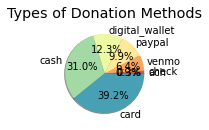

In [62]:
plt.subplot(the_grid[0, 1], aspect=1, title='Types of Donation Methods')
type_show_ids = plt.pie(method_counts, labels=method_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

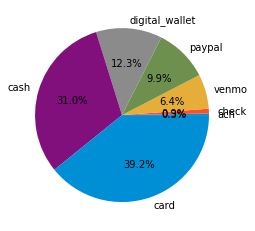

In [69]:
plt.pie(method_counts, labels = method_labels, autopct='%1.1f%%')
#plt.legend()
plt.show()

# (When) Day of Week + Campaign Chart

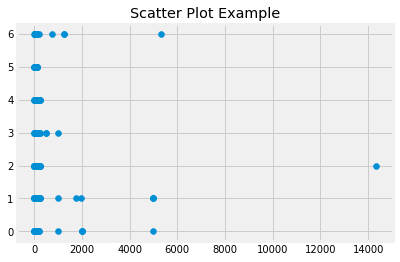

In [44]:
plt.scatter(donations['amount'], donations['donation_day'])
plt.title('Scatter Plot Example')
plt.show()

references

https://pythonguides.com/python-plot-multiple-lines/

*   https://pythonguides.com/python-plot-multiple-lines/
*   https://www.python-graph-gallery.com/122-multiple-lines-chart
*   https://www.statology.org/plot-multiple-lines-matplotlib/



In [ ]:
Donate_to_Unscripted = donations[donations['campaign'] == 'Donate to Unscripted'].groupby(['donation_day'])['amount'].sum()
print(Donate_to_Unscripted)

donation_day
1    325.0
2     20.0
3    155.0
4     50.0
5      5.0
Name: amount, dtype: float64


In [ ]:
Trivia_Night = donations[donations['campaign'] == 'The Unscripted Project Trivia Night'].groupby(['donation_day'])['amount'].sum()
print(Trivia_Night)

donation_day
0    155.0
1     95.0
2    190.0
3    220.0
5    190.0
6    280.0
Name: amount, dtype: float64


In [ ]:
Fall_Campaign_2020 = donations[donations['campaign'] == 'Unscripted 20/2020 Fall Campaign'].groupby(['donation_day'])['amount'].sum()
print(Fall_Campaign_2020)

donation_day
0    9767.0
1    3170.0
2    2232.0
3    2288.0
4     830.0
5     460.0
6    5975.0
Name: amount, dtype: float64


In [ ]:
Wrap_Party_2021 = donations[donations['campaign'] == 'Unscripted 2021 Fundraiser Wrap Party'].groupby(['donation_day'])['amount'].sum()
print(Wrap_Party_2021)

donation_day
0     70.0
1    140.0
2    140.0
3     70.0
4    435.0
5    515.0
6    505.0
Name: amount, dtype: float64


In [ ]:
Back_to_School_2021 = donations[donations['campaign'] == 'Unscripted Back to School 2021 Campaign'].groupby(['donation_day'])['amount'].sum()
print(Back_to_School_2021)

donation_day
0     3325.0
1    19645.0
2    17349.0
3     2975.0
4     1330.0
5      200.0
6     3645.0
Name: amount, dtype: float64


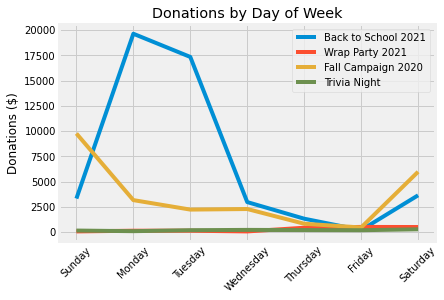

In [ ]:
plt.plot(Back_to_School_2021)
plt.plot(Wrap_Party_2021)
plt.plot(Fall_Campaign_2020)
plt.plot(Trivia_Night)
plt.title('Donations by Day of Week')
#plt.xlabel('day of week')
plt.xticks([0,1,2,3,4,5,6], ["Sunday",'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xticks(rotation=45)
str_day_list = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.ylabel('Donations ($)')
plt.legend(loc = 'upper right', labels=["Back to School 2021",'Wrap Party 2021','Fall Campaign 2020','Trivia Night'] )
plt.show()

AttributeError: ignored

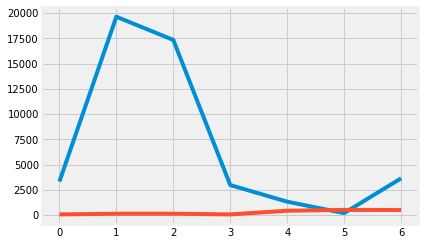

In [ ]:
fig, ax = plt.subplots()
str_day_list = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
x = str_day_list
ax.plot(Back_to_School_2021, label='Back to School')
ax.plot(Wrap_Party_2021, label='Wrap Party 2021')
ax.xlabel('day of week')
ax.ylabel('$_donated')

In [ ]:

day_of_week_donations = pd.DataFrame(donations.groupby(['campaign','donation_day'])['amount'].sum())
print(day_of_week_donations)

                                                       amount
campaign                                donation_day         
Donate to Unscripted                    1               325.0
                                        2                20.0
                                        3               155.0
                                        4                50.0
                                        5                 5.0
The Unscripted Project Trivia Night     0               155.0
                                        1                95.0
                                        2               190.0
                                        3               220.0
                                        5               190.0
                                        6               280.0
Unscripted 20/2020 Fall Campaign        0              9767.0
                                        1              3170.0
                                        2              2232.0
        

In [ ]:
day_of_week_donations.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 32 entries, ('Donate to Unscripted', 1) to ('Unscripted Back to School 2021 Campaign', 6)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   amount  32 non-null     float64
dtypes: float64(1)
memory usage: 534.0+ bytes


In [ ]:
unstacked_df = day_of_week_donations.unstack()

In [ ]:
unstacked_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Donate to Unscripted to Unscripted Back to School 2021 Campaign
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (amount, 0)  4 non-null      float64
 1   (amount, 1)  5 non-null      float64
 2   (amount, 2)  5 non-null      float64
 3   (amount, 3)  5 non-null      float64
 4   (amount, 4)  4 non-null      float64
 5   (amount, 5)  5 non-null      float64
 6   (amount, 6)  4 non-null      float64
dtypes: float64(7)
memory usage: 320.0+ bytes


In [ ]:
print(day_of_week_donations)

                                                       amount
campaign                                donation_day         
Donate to Unscripted                    1               325.0
                                        2                20.0
                                        3               155.0
                                        4                50.0
                                        5                 5.0
The Unscripted Project Trivia Night     0               155.0
                                        1                95.0
                                        2               190.0
                                        3               220.0
                                        5               190.0
                                        6               280.0
Unscripted 20/2020 Fall Campaign        0              9767.0
                                        1              3170.0
                                        2              2232.0
        

In [ ]:
plt.plot( 'donation_day', 'y1_values', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x_values', 'y2_values', data=df, marker='', color='olive', linewidth=2)

NameError: ignored

In [ ]:
plt.plot(day_of_week_donations[day_of_week_donations.campaign =='Donate to Unscripted'])

AttributeError: ignored

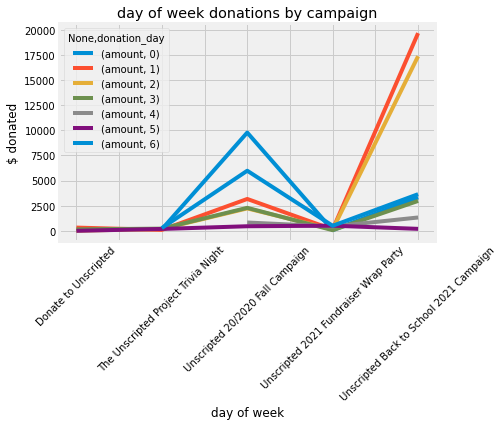

In [ ]:
day_of_week_donations.unstack().plot()
plt.title('day of week donations by campaign')
plt.xlabel('day of week')
plt.xticks(rotation=45)
plt.ylabel('$ donated')
#plt.legend(loc = 'upper right', labels=donations.campaign.values)
plt.show()

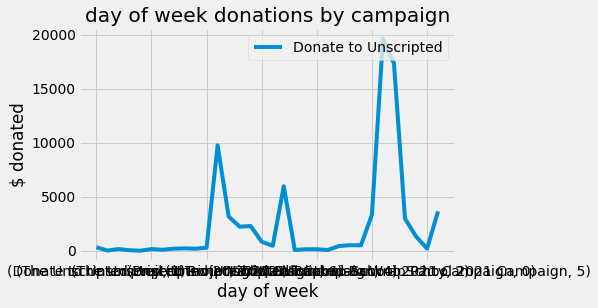

In [ ]:
day_of_week_donations.plot()
plt.title('day of week donations by campaign')
plt.xlabel('day of week')
plt.ylabel('$ donated')
plt.legend(loc = 'upper right', labels=donations.campaign.values)
plt.show()

In [ ]:
day_of_week_donations2 = donations.groupby(['donation_day','campaign'])['amount'].sum()
print(day_of_week_donations2)

donation_day  campaign                               
0             The Unscripted Project Trivia Night          155.0
              Unscripted 20/2020 Fall Campaign            9767.0
              Unscripted 2021 Fundraiser Wrap Party         70.0
              Unscripted Back to School 2021 Campaign     3325.0
1             Donate to Unscripted                         325.0
              The Unscripted Project Trivia Night           95.0
              Unscripted 20/2020 Fall Campaign            3170.0
              Unscripted 2021 Fundraiser Wrap Party        140.0
              Unscripted Back to School 2021 Campaign    19645.0
2             Donate to Unscripted                          20.0
              The Unscripted Project Trivia Night          190.0
              Unscripted 20/2020 Fall Campaign            2232.0
              Unscripted 2021 Fundraiser Wrap Party        140.0
              Unscripted Back to School 2021 Campaign    17349.0
3             Donate to Unscripted  

TypeError: ignored

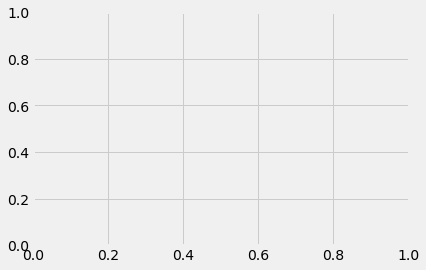

In [ ]:
plt.plot(day_of_week_donations['amount'])

plt.show()

In [ ]:
donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   campaign        353 non-null    object        
 1   reference#      353 non-null    int64         
 2   donorID         353 non-null    object        
 3   city            302 non-null    object        
 4   state           303 non-null    object        
 5   country         313 non-null    object        
 6   method          342 non-null    object        
 7   amount          353 non-null    float64       
 8   referer         69 non-null     object        
 9   subtype         353 non-null    object        
 10  description     353 non-null    object        
 11  quantity        353 non-null    int64         
 12  donation_times  353 non-null    datetime64[ns]
 13  donation_day    353 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memo

In [ ]:
# pivot the data into the correct shape
dfpivote = donations.pivot(index = 'donation_day', columns = 'campaign', values = 'amount'.sum)
display(df)

AttributeError: ignored

In [ ]:
fig, ax = plt.subplots()

for key, grp in donations.groupby(['campaign']):
    ax = grp.plot(ax=ax, kind='line', x='donation_day', y='amount', c=key, label=key)

plt.legend(loc='best')
plt.show()

ValueError: ignored

<Figure size 432x288 with 1 Axes>

# Segmenting donors

In [ ]:
#RFM analysis???

In [ ]:
#read speicfic rows of donations

donations.loc[donations['Amount'] > 400]

In [ ]:
#heatmap based on STATE!! ($$ > COUNT of donations )

# Next steps & future analysis